In [1]:
import collections
import typing
import numpy as np
import tqdm
import re
import nltk

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
NUMBER_TOKEN = 'NUMBER'
NGRAM_SEP = '_'
TILDA_SEP = '~'
UNK_TOKEN = 'UNK'

In [3]:
en_stopwords = nltk.corpus.stopwords.words('english')

In [4]:
# 1. Read text

with open('data/text_small.txt', 'r') as f:
    raw_data = f.read()
    # Get rid of underscores and tildas
    raw_data = raw_data.replace('_', ' ')
    raw_data = raw_data.replace('~', ' ')

len(raw_data)

2940422

In [5]:
# tmp = raw_data[:2000]
tmp = raw_data
tmp_sent = nltk.tokenize.sent_tokenize(tmp)
tmp_sent[:2]

['BACKGROUND: Rivaroxaban is currently used to prevent stroke in patients with atrial fibrillation.',
 'Measuring coagulation function may help clinicians to understand the effects of this drug and the associated risk of bleeding.']

In [6]:
'kek'.replace('e', ' ').replace('k', 'a')

'a a'

In [7]:
def regexp_word_tokenize(string: str) -> list:
    # FIX: it doesn't split by underscore!!
    rgx = re.compile("([\w]*\w)")
    return rgx.findall(string)


def merge_numbers(words: list) -> list:
    def startswith_digit(string: str) -> bool:
        return string[0].isdigit()
 
    ans = []
    i = 0
    while i < len(words):
        j = 0
        while i + j < len(words) and startswith_digit(words[i + j]):
            j += 1
        if i + j > 1 and startswith_digit(words[i + j - 1]):
            ans.append(NUMBER_TOKEN)
        if i + j < len(words):
            ans.append(words[i + j])
        i += j + 1
    return ans


def cool_tokenize(string: str) -> list:
    """
    Tokenize and replace numbers with `NUMBER_TOKEN`.
    """
    string = string.lower()
    tkzd = regexp_word_tokenize(string)
    return merge_numbers(tkzd)

In [8]:
# 2. Tokenize each of sentences

tmp_sent_tkzd = list(map(lambda x: cool_tokenize(x), tmp_sent))
tmp_sent_tkzd = list(filter(lambda x: len(x), tmp_sent_tkzd))
tmp_sent_tkzd[:2]

[['background',
  'rivaroxaban',
  'is',
  'currently',
  'used',
  'to',
  'prevent',
  'stroke',
  'in',
  'patients',
  'with',
  'atrial',
  'fibrillation'],
 ['measuring',
  'coagulation',
  'function',
  'may',
  'help',
  'clinicians',
  'to',
  'understand',
  'the',
  'effects',
  'of',
  'this',
  'drug',
  'and',
  'the',
  'associated',
  'risk',
  'of',
  'bleeding']]

In [9]:
def make_ngrams(words: list, upto=2) -> list:
    if len(words) > 1:
        res = []
        for i in range(1, upto + 1):
            res.extend(nltk.ngrams(words, i))
        return res
    else:
        return [tuple(words)]

In [10]:
# 3. Get ngrams for each of sentences

tmp_ngrams = list(map(lambda x: make_ngrams(x, 3), tmp_sent_tkzd))
tmp_ngrams[:1]

[[('background',),
  ('rivaroxaban',),
  ('is',),
  ('currently',),
  ('used',),
  ('to',),
  ('prevent',),
  ('stroke',),
  ('in',),
  ('patients',),
  ('with',),
  ('atrial',),
  ('fibrillation',),
  ('background', 'rivaroxaban'),
  ('rivaroxaban', 'is'),
  ('is', 'currently'),
  ('currently', 'used'),
  ('used', 'to'),
  ('to', 'prevent'),
  ('prevent', 'stroke'),
  ('stroke', 'in'),
  ('in', 'patients'),
  ('patients', 'with'),
  ('with', 'atrial'),
  ('atrial', 'fibrillation'),
  ('background', 'rivaroxaban', 'is'),
  ('rivaroxaban', 'is', 'currently'),
  ('is', 'currently', 'used'),
  ('currently', 'used', 'to'),
  ('used', 'to', 'prevent'),
  ('to', 'prevent', 'stroke'),
  ('prevent', 'stroke', 'in'),
  ('stroke', 'in', 'patients'),
  ('in', 'patients', 'with'),
  ('patients', 'with', 'atrial'),
  ('with', 'atrial', 'fibrillation')]]

In [11]:
def contains_stopword(ngram: tuple, stopwords=en_stopwords) -> bool:
    list_of_bool = list(map(lambda x: x in stopwords, ngram))
    return any(list_of_bool)

def remove_bad_ngrams(ngrams: list) -> list:
    return list(filter(lambda x: contains_stopword(x) == False, ngrams))

In [12]:
# 4. Remove ngrams containing stopwords

# tmp_ngrams_clean = list(map(lambda x: remove_bad_ngrams(x), tmp_ngrams))
tmp_ngrams_clean = tmp_ngrams

In [13]:
tmp_ngrams_clean[0]

[('background',),
 ('rivaroxaban',),
 ('is',),
 ('currently',),
 ('used',),
 ('to',),
 ('prevent',),
 ('stroke',),
 ('in',),
 ('patients',),
 ('with',),
 ('atrial',),
 ('fibrillation',),
 ('background', 'rivaroxaban'),
 ('rivaroxaban', 'is'),
 ('is', 'currently'),
 ('currently', 'used'),
 ('used', 'to'),
 ('to', 'prevent'),
 ('prevent', 'stroke'),
 ('stroke', 'in'),
 ('in', 'patients'),
 ('patients', 'with'),
 ('with', 'atrial'),
 ('atrial', 'fibrillation'),
 ('background', 'rivaroxaban', 'is'),
 ('rivaroxaban', 'is', 'currently'),
 ('is', 'currently', 'used'),
 ('currently', 'used', 'to'),
 ('used', 'to', 'prevent'),
 ('to', 'prevent', 'stroke'),
 ('prevent', 'stroke', 'in'),
 ('stroke', 'in', 'patients'),
 ('in', 'patients', 'with'),
 ('patients', 'with', 'atrial'),
 ('with', 'atrial', 'fibrillation')]

In [14]:
def get_unigrams(ngrams: list) -> list:
    unigram_tuples = list(filter(lambda x: len(x) == 1, ngrams))
    unigrams = list(map(lambda x: x[0], unigram_tuples))
    return unigrams

def make_sentence(ngrams: list):
    unigrams = get_unigrams(ngrams)
    return ' '.join(unigrams)

In [15]:
# 5. Make sentences

tmp_sent_clean = list(map(lambda x: make_sentence(x), tmp_ngrams_clean))
tmp_sent_clean[:2]

['background rivaroxaban is currently used to prevent stroke in patients with atrial fibrillation',
 'measuring coagulation function may help clinicians to understand the effects of this drug and the associated risk of bleeding']

In [16]:
import itertools
from collections import Counter

In [17]:
def make_dict(ngrams: list, threshold=3) -> dict:
    def ngrams_to_str(ngrams: list) -> list:
        return list(map(lambda x: NGRAM_SEP.join(x), ngrams))

    def merge_list(ngrams_list: list) -> list:
        return list(itertools.chain.from_iterable(ngrams_list))


    cntr = Counter(ngrams_to_str(merge_list(ngrams)))
    cntr = list(filter(lambda x: x[1] > threshold, cntr.items()))
    
    dictionary = {UNK_TOKEN: 0}
    for item, _ in cntr:
        dictionary[item] = len(dictionary)
        
    return dictionary

In [18]:
# 6. Building dictionary

dictionary = make_dict(tmp_ngrams_clean)
reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))

In [19]:
def ngrams_from_dict(dictionary: dict) -> list:
    return list(filter(lambda x: NGRAM_SEP in x, dictionary.keys()))

def tildas_from_dict(dictionary: dict) -> list:
    return list(filter(lambda x: TILDA_SEP in x, dictionary.keys()))

def split_ngrams(ngrams: list) -> list:
    return list(map(lambda x: x.split(NGRAM_SEP), ngrams))

def sort_ngrams(ngrams: list) -> list:
    return list(map(lambda x: sorted(x), ngrams))

def make_tilda_tokens(ngrams: list) -> list:
    return list(map(lambda x: TILDA_SEP.join(x), ngrams))

def unique_tilda_tokens(dictionary: dict) -> list:
    return list(set(make_tilda_tokens(sort_ngrams(split_ngrams(ngrams_from_dict(dictionary))))))

In [20]:
def make_tilda_tokens(dictionary: dict) -> list:
    """
    Convert ngrams from `dictionary` into tilda tokens.
    :param dictionary:
    :return:
    """
    def to_tilda_tokens(ngrams: list) -> list:
        """
        >>> ngrams = [['atrial', 'fibrillation'], ['help', 'may']]
        >>> to_tilda_tokens(ngrams) == ['atrial~fibrillation', 'help~may']
        True
        """
        return list(map(lambda x: TILDA_SEP.join(x), ngrams))

    def sort_ngrams(ngrams: list) -> list:
        """
        >>> ngrams = [['atrial', 'fibrillation'], ['may', 'help']]
        >>> sort_ngrams(ngrams) == [['atrial', 'fibrillation'], ['help', 'may']]
        True
        """
        return list(map(lambda x: sorted(x), ngrams))

    def split_ngrams(ngrams: list) -> list:
        """
        >>> ngrams = ['currently_used', 'atrial_fibrillation', 'may_help']
        >>> split_ngrams(ngrams) == [['currently', 'used'], ['atrial', 'fibrillation'], ['may', 'help']]
        True
        """
        return list(map(lambda x: x.split(NGRAM_SEP), ngrams))

    return list(set(to_tilda_tokens(sort_ngrams(split_ngrams(ngrams_from_dict(dictionary))))))

In [21]:
# 7. Extend dictionary with tilda tokens

def make_dict(ngrams: list, threshold=3) -> tuple:
    """
    :param ngrams: list of lists of ngram tuples
    :param threshold: min frequency of token
    :return: `dictionary` {token: id, ...} and `reversed_dictionary` {id: token, ...}
    """
    def ngrams_to_str(ngrams: list) -> list:
        """
        >>> ngrams = [('used',),('background', 'rivaroxaban')]
        >>> ngrams_to_str(ngrams) == ['used', 'background_rivaroxaban']
        True
        """
        return list(map(lambda x: NGRAM_SEP.join(x), ngrams))

    def merge_list(ngrams_list: list) -> list:
        """
        >>> merge_list([[1,2,3], [4]]) == [1, 2, 3, 4]
        True
        """
        return list(itertools.chain.from_iterable(ngrams_list))

    cntr = collections.Counter()
    cntr.update(ngrams_to_str(merge_list(ngrams)))
    cntr = list(filter(lambda x: x[1] > threshold, cntr.items()))

    dictionary = {UNK_TOKEN: 0}
    for item, _ in cntr:
        dictionary[item] = len(dictionary)

    def make_tilda_tokens(dictionary: dict) -> list:
        """
        Convert ngrams from `dictionary` into tilda tokens.
        :param dictionary:
        :return:
        """
        def to_tilda_tokens(ngrams: list) -> list:
            """
            >>> ngrams = [['atrial', 'fibrillation'], ['help', 'may']]
            >>> to_tilda_tokens(ngrams) == ['atrial~fibrillation', 'help~may']
            True
            """
            return list(map(lambda x: TILDA_SEP.join(x), ngrams))

        def sort_ngrams(ngrams: list) -> list:
            """
            >>> ngrams = [['atrial', 'fibrillation'], ['may', 'help']]
            >>> sort_ngrams(ngrams) == [['atrial', 'fibrillation'], ['help', 'may']]
            True
            """
            return list(map(lambda x: sorted(x), ngrams))

        def split_ngrams(ngrams: list) -> list:
            """
            >>> ngrams = ['currently_used', 'atrial_fibrillation', 'may_help']
            >>> split_ngrams(ngrams) == [['currently', 'used'], ['atrial', 'fibrillation'], ['may', 'help']]
            True
            """
            return list(map(lambda x: x.split(NGRAM_SEP), ngrams))

        return list(set(to_tilda_tokens(sort_ngrams(split_ngrams(ngrams_from_dict(dictionary))))))

    tilda_tokens = make_tilda_tokens(dictionary)

    for item in tilda_tokens:
        dictionary[item] = len(dictionary)

    reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))

    return dictionary, reversed_dictionary

In [22]:
dictionary, reversed_dictionary = make_dict(tmp_ngrams_clean)

In [23]:
def replace_unk(string: str, dictionary=dictionary) -> str:
    list_unk = list(map(lambda x: x if x in dictionary else UNK_TOKEN, string.split()))
    return ' '.join(list_unk)

def tokenize_ids(string: str, dictionary=dictionary) -> list:
    return list(map(lambda x: dictionary[x] if x in dictionary else dictionary[UNK_TOKEN], string.split()))

In [24]:
replace_unk('to amino')

'to amino'

In [26]:
# 8. Replace out-of-vocabulary words with `UNK_TOKEN`

tmp_sent_unk = list(map(lambda x: replace_unk(x), tmp_sent_clean))
tmp_sent_unk = list(filter(lambda x: len(x) > 0, tmp_sent_unk))

In [27]:
def indices_for_ngram(ngram: str) -> tuple:
    indices = tuple(list(map(lambda x: dictionary[x], ngram.split(NGRAM_SEP))))
    return tuple([tuple(indices), dictionary[ngram]])

def indices_for_tilda(ngram: str) -> tuple:
    indices = sorted(list(map(lambda x: dictionary[x], ngram.split(TILDA_SEP))))
    indices = tuple(indices)
    return tuple([tuple(sorted(indices)), dictionary[ngram]])

In [28]:
def ngram_id(ngram_tuple: tuple) -> int:
    if ngram_tuple in dict_ngram_id_by_tuple:
        return dict_ngram_id_by_tuple[ngram_tuple]
    else:
        return 0
    
def tilda_id(tilda_tuple: tuple) -> int:
    tilda_tuple = tuple(sorted(tilda_tuple))
    if tilda_tuple in dict_tilda_id_by_tuple:
        return dict_tilda_id_by_tuple[tilda_tuple]
    else:
        return 0

In [29]:
def make_tupled_dicts(dictionary: dict) -> tuple:
    """
    :param dictionary:
    :return: `dict_ngram_id_by_tuple`, `dict_tilda_id_by_tuple`
    """
    dict_ngram_id_by_tuple = {}
    dict_tilda_id_by_tuple = {}

    # ngrams
    for ngram in ngrams_from_dict(dictionary):
        tmp = indices_for_ngram(ngram)
        words_tup, ngram_id = tmp
        dict_ngram_id_by_tuple[words_tup] = ngram_id

    # tildas
    for tilda in tildas_from_dict(dictionary):
        tmp = indices_for_tilda(tilda)
        words_tup, tilda_id = tmp
        dict_tilda_id_by_tuple[words_tup] = tilda_id

    return dict_ngram_id_by_tuple, dict_tilda_id_by_tuple

In [30]:
dict_ngram_id_by_tuple, dict_tilda_id_by_tuple = make_tupled_dicts(dictionary)

In [31]:
indices_for_ngram(ngrams_from_dict(dictionary)[0])

((3, 4), 14)

In [33]:
reversed_dictionary[3], reversed_dictionary[4], reversed_dictionary[14]

('is', 'currently', 'is_currently')

In [34]:
indices_for_tilda('currently~used'), indices_for_ngram('currently_used')

(((4, 5), 33277), ((4, 5), 15))

In [35]:
reversed_dictionary[1506], reversed_dictionary[1383], reversed_dictionary[6770]

('neoplasia', 'spectrum', 'leukemia')

In [37]:
# Try to train word2gauss.

from word2gauss import GaussianEmbedding, iter_pairs
from word2gauss.words import Vocabulary

vocab_gauss = Vocabulary(dictionary)
embed = GaussianEmbedding(len(dictionary), 100,
                          covariance_type='diagonal',
                          energy_type='KL')

In [39]:
# tmp_sent_unk = sorted()
tmp_sent_unk = sorted(tmp_sent_unk, key=lambda x: len(x.split()))

In [51]:
tmp_sent_unk[10000]

'the suitability of type i collagen as a carrier matrix provides ample opportunity for tissue engineered approaches to further facilitate bony defect healing'

In [52]:
%%time
embed.train(
    iter_pairs(tmp_sent_unk[60:10000], vocab_gauss, ngram_id,
               tilda_id, batch_size=10, nsamples=2,
               window=5, n=3),
    n_workers=8)

CPU times: user 1min 32s, sys: 2.99 s, total: 1min 35s
Wall time: 52.5 s


In [91]:
# list(filter(lambda x: x.count(NGRAM_SEP) == 2, get_ngrams_from_dict(dictionary)))

In [53]:
def nearest(token, num=10):
    return [x["word"] for x in embed.nearest_neighbors([(token,)], vocab=vocab_gauss, num=num)]

In [54]:
nearest('normal_breast_tissue')

['normal_breast_tissue',
 'heterogeneity~of',
 'to~tools',
 'nps',
 'amyloid~beta~deposits',
 'according~to',
 'intraocular',
 'roles_for',
 'membrane_protein',
 'migration_and']

In [80]:
nearest('radix_paeoniae_rubra')

['radix_paeoniae_rubra',
 'suspensions',
 'endocycling',
 'binuclear_complex',
 'dcr',
 'powered',
 'cf3_NUMBER',
 'gene~mthfr',
 'co2',
 'causative']

In [55]:
nearest('amino_acid')

['amino_acid',
 'in_individuals',
 'dimensional~three',
 'door~to',
 'therapy_of',
 'adhere~to',
 'may~system',
 'epsilon',
 'a~across',
 'p~selectin']

In [57]:
nearest('rats')

['rats',
 'orally',
 'ratio',
 'cabg',
 'weeks',
 'was',
 'signaling_pathways_in',
 'a',
 'sit',
 'daily']

In [82]:
print([x["word"] for x in embed.nearest_neighbors([('male',)], vocab=vocab_gauss, num=20)])

['male', 'homozygous', 'iqr', 'NUMBER~age', 'NUMBER~cohort', 'experienced', 'female', 'odds', 'acute', 'underwent', 'abmd', 'bcva', 'infarction', 'mean', 'NUMBER~risk', 'boys', 'summary', 'surgery', 'NUMBER~confidence', 'npdr']


In [93]:
print([x["word"] for x in embed.nearest_neighbors([('crf01',)], vocab=vocab_gauss, num=20)])

['crf01', 'translocated', 'findings_suggest', 'mediators', 'choroid', 'data_reveal', 'hematologic', 'oocytes', 'wky', 'results_suggest', 'retrieved', 'outcomes_including', 'theoretical', 'caudate', 'extreme', 'elevated~serum', 'cyclobutane', 'lung_disease', 'dfs', 'mediated_induction']


In [97]:
print([x["word"] for x in embed.nearest_neighbors([('ae',)], vocab=vocab_gauss, num=20)])

['ae', 'crystal~structures', 'accompanied', 'serotonin_NUMBER', 'cu_ii', 'nmr', 'bioassays', 'phox', 'c_elegans', 'neurotrophic_factor', 'pg_NUMBER', 'mm_hg', 'formers~stone', 'mt', 'vs_placebo', 'rna', 'significantly_enhanced', 'monophosphate', 'NUMBER~gene', 'NUMBER_samples']


In [81]:
def gaussian_kl(gaus1, gaus2):
    ans = (1. / 2.) * \
          (np.trace(np.dot(np.linalg.inv(gaus2['sigma']), gaus1['sigma'])) + 
           np.dot(gaus2['mu'] - gaus1['mu'], np.dot(np.linalg.inv(gaus2['sigma']), gaus2['mu'] - gaus1['mu'])) - 
           len(gaus1['mu']) + np.log(np.linalg.det(gaus2['sigma']) / np.linalg.det(gaus1['sigma'])))
    return ans

In [80]:
def calc_kl(bigram):
    """
    Calculate KL-divergence.
    :param bigram: string
    """
    def gaus_repr(token):
        """
        Returns
        -------
        list of mus, list of sigmas
        
        """
        if TILDA_SEP in token:
            token = token.split(TILDA_SEP)
            token = sorted(token)
            token = TILDA_SEP.join(token)
        mu = embed.mu[vocab_gauss.word2id(token)]
        sigma = np.diag(embed.sigma[vocab_gauss.word2id(token)]) # Diagonal matrix.
        return mu, sigma

    # Gaussian representation of `bigram`.
    mu_bigram, sigma_bigram = gaus_repr(bigram)
    
    # Gaussian representation of tilda-token.
    tilda = bigram.replace('_', '~')
    mu_tilda, sigma_tilda = gaus_repr(tilda)
    
    gaus_tilda =  {'mu' : mu_tilda,  'sigma' : sigma_tilda}
    gaus_bigram = {'mu' : mu_bigram, 'sigma' : sigma_bigram}
    
    return gaussian_kl(gaus_bigram, gaus_tilda)

In [59]:
calc_kl('important_role')

6.038118839263916

In [60]:
calc_kl('amino_acid')

5.8055644035339355

In [61]:
calc_kl('breast_cancer')

5.560778021812439

In [62]:
calc_kl('of_the')

3.8449275493621826

In [64]:
calc_kl('data_show')

5.3782787919044495

In [82]:
calc_kl('crf01_ae')

7.1621488332748413

In [83]:
calc_kl('radix_paeoniae_rubra')

6.3559590578079224

In [84]:
calc_kl('approximately_NUMBER_million')

6.4489107131958008

In [85]:
embed.mu.shape

(109352, 100)

In [86]:
len(dictionary)

54676

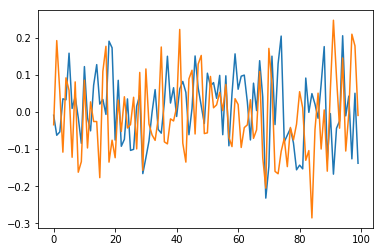

In [87]:
tmpid = 101
plt.plot(embed.mu[tmpid])
plt.plot(embed.mu[len(dictionary) + tmpid])

In [89]:
def gaus_repr(token):
    """
    Gaussian representation of token.
    :return: mu and sigma
    """
    if TILDA_SEP in token:
        token = token.split(TILDA_SEP)
        token = sorted(token)
        token = TILDA_SEP.join(token)

    return (embed.mu[vocab_gauss.word2id(token)],
            np.diag(embed.sigma[vocab_gauss.word2id(token)]))  # Diagonal matrix.

In [90]:
def calc_variational_kl(bigram, order=0):
    """
    Calculate KL-divergence of bigram and corresponding mixture.
    :param bigram: string
    :param order: int
        If order is 0, then KL(bigram, mixture) is calculated;
        if order is 1, then KL(mixture, bigram) is calculated.
    """
#     word1 = bigram.split('_')[0]
#     word2 = bigram.split('_')[1]

#     # Gaussian representation of first word in `bigram`.
#     mu1, sigma1 = gaus_repr(word1)

#     # Gaussian representation of second word in `bigram`.
#     mu2, sigma2 = gaus_repr(word2)

#     mu_words = np.array([mu1, mu2])
#     sigma_words = np.array([np.diag(sigma1), np.diag(sigma2)])

    mu_words = []
    sigma_words = []
    for word in bigram.split('_'):
        mu, sigma = gaus_repr(word1)
        mu_words.append(mu)
        sigma_words.append(np.diag(sigma))
    mu_words = np.array(mu_words)
    sigma_words = np.array(sigma_words)
    
    
    # Gaussian representation of `bigram`.
    mu_bigram, sigma_bigram = gaus_repr(bigram)
    mu_bigram = np.array([mu_bigram])
    sigma_bigram = np.arrary([sigma_bigram])

#     weights_words = [1./2., 1./2.]
    weights_words = [1./len(bigram.split('_'))] * len(bigram.split('_'))
    weights_bigram = [1.]

    def complex_kl(f, g):
        ans = 0
        for a, pi in enumerate(f['weights']):
            sum1 = 0
            sum2 = 0

            for b, ksi in enumerate(f['weights']):
                params_a = {'mu': f['mus'][a], 'sigma': f['sigmas'][a]}
                params_b = {'mu': f['mus'][b], 'sigma': f['sigmas'][b]}
                sum1 += ksi * np.exp((-1.) * gaussian_kl(params_a, params_b))

            for c, omega in enumerate(g['weights']):
                params_a = {'mu': f['mus'][a], 'sigma': f['sigmas'][a]}
                params_c = {'mu': g['mus'][c], 'sigma': g['sigmas'][c]}
                sum2 += omega * np.exp((-1) * gaussian_kl(params_a, params_c))

            ans += pi * np.log(sum1 / sum2)

        return ans

    if order == 0:
        g = {'mus': mu_bigram, 'sigmas': sigma_bigram, 'weights': weights_bigram}
        f = {'mus': mu_words, 'sigmas': sigma_words, 'weights': weights_words}
    elif order == 1:
        g = {'mus': mu_words, 'sigmas': sigma_words, 'weights': weights_words}
        f = {'mus': mu_bigram, 'sigmas': sigma_bigram, 'weights': weights_bigram}
    else:
        raise

    # KL(g, f)
    return complex_kl(g, f)

In [91]:
def kl(bigram, order=0):
    '''
    Calculates kl-score of bigram and corresponding tilda-token.
    :param bigram: string
    :param order: int
        If order is 0, then KL(bigram, tilda-token) is calculated;
        if order is 1, then KL(tilda-token, bigram) is calculated.
    '''
    # Gaussian representation of `bigram`.
    mu_bigram, sigma_bigram = gaus_repr(bigram)

    # Gaussian representation of tilda-token.
    tilda = bigram.replace('_', '~')
    mu_tilda, sigma_tilda = gaus_repr(tilda)

    if order == 0:
        gaus1 = {'mu': mu_bigram, 'sigma': sigma_bigram}
        gaus2 = {'mu': mu_tilda,  'sigma': sigma_tilda}
    elif order == 1:
        gaus1 = {'mu': mu_tilda,  'sigma': sigma_tilda}
        gaus2 = {'mu': mu_bigram, 'sigma': sigma_bigram}
    else:
        raise

    return gaussian_kl(gaus1, gaus2)

def score_ngrams(func_type=0, order=0):
    """
    :param func_type: int
        Which function to use to calculate KL-divergence.
        If type is 0, then the gaussian KL is used;
        if type is 1, then the variational KL is used.
    :param order: int
        If order is 0, then KL(bigram, token) is calculated;
        if order is 1, then KL(token, bigram) is calculated.
    :return: List of scored ngrams
    """
    res = {}

    func = None

    if func_type == 0:
        func = kl
    elif func_type == 1:
        func = calc_variational_kl
    else:
        raise

    for bigram in tqdm.tqdm(ngrams_from_dict(dictionary)):
        res[bigram] = func(bigram, order)

    return sorted(res.items(), key=lambda x: x[1], reverse=True)

In [92]:
score_ngrams(1,1)

  0%|          | 0/22918 [00:00<?, ?it/s]


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

#__processor___

In [378]:
from processor import Processor

In [379]:
proc = Processor(raw_data)

> Done with ._get_sentences()
> Done with ._get_dictionaries()
> Done with ._build_ids_tuples()


In [90]:
# proc.sentences

In [386]:
from word2gauss.words import Vocabulary
vocab_gauss = Vocabulary(dictionary)

In [91]:
vocab_gauss.tokenize_ids('this paper demonstrates that sulfide toxicity can be modified and dehydroascorbic acid functions as an effector in this process', remove_oov=False)

array([   0,  264, 1040,    0, 1022, 1041,    0,    0, 1042,    0, 1043,
       1044, 1025,    0,    0, 1045,    0,    0,  790], dtype=uint32)

In [4]:
proc.train_embeddings()